In [1]:
import sys
sys.path.append('..')
sys.path.append('../hypothesis_generation')


from PIL import Image as PImage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import pickle
import json
from torchvision.utils import make_grid
import torch
from hypothesis_generation.prefix_postfix import PrefixPostfix
from hypothesis_generator import GrammarExpander
from reduce_and_process_hypotheses import MetaDatasetExample
from reduce_and_process_hypotheses import HypothesisEval

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
properties_file = "/private/home/ramav/code/ad_hoc_categories/concept_data/clevr_typed_fol_properties.json"
grammar_expander = ("/private/home/ramav/code/ad_hoc_categories"
                    "/concept_data/temp_data/v2_typed_simple_fol_clevr_typed_fol_properties.pkl")
program_converter = PrefixPostfix(
    properties_file, grammar_expander_file=grammar_expander
)

In [7]:
def visualize_example(query_and_support, data_idx, split_name="train"):
    hypothesis = query_and_support[split_name].hypothesis
    
    fig = plt.figure(figsize=(10, 20))
    for idx, image_path in enumerate(query_and_support[split_name].image_paths_positive):
        ax = plt.subplot(1, 5, idx + 1)
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.axis('off')
        if idx == 0:
            ax.set_title("%d] Query, %s" % (data_idx, program_converter.postfix_to_prefix(hypothesis)))
    
    fig = plt.figure(figsize=(10,20))    

    for idx, image_path in enumerate(query_and_support[split_name].image_paths_negative):
        if idx >= 5 * 4:
            break
        ax = plt.subplot(4, 5, idx + 1)
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.axis('off')
        if idx == 0:
            ax.set_title("%d] Query, %s" % (data_idx, '\n'.join([program_converter.postfix_to_prefix(x) for 
                                    x in query_and_support[split_name].alternate_hypothesis_str])))
               

In [4]:
dataset_json = ("${CURI_DATA_PATH}/"
                "hypotheses/v2_typed_simple_fol_depth_6_trails_200000/"
                "train_threshold_0.100000_pos_im_5_neg_im_20_num_examples_200"
                "_neg_type_counter_hypotheses_alternate_hypo_1_random_seed_42.pkl")

In [5]:
with open(dataset_json, 'rb') as f:
    dataset = pickle.load(f)
    dataset = dataset["meta_dataset"]

Text(0, 0.5, 'Count')

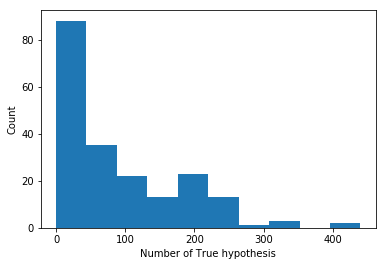

In [6]:
# check average number of alternate hypotheses.
alt_hypotheses = []
for datum in dataset:
    alt_hypotheses.append(len(datum['train'].alternate_hypothesis_str))
    
plt.hist(alt_hypotheses)
plt.xlabel('Number of True hypothesis')
plt.ylabel('Count')

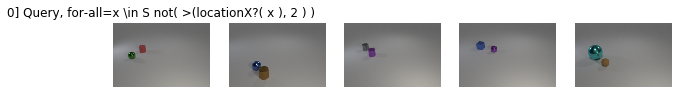

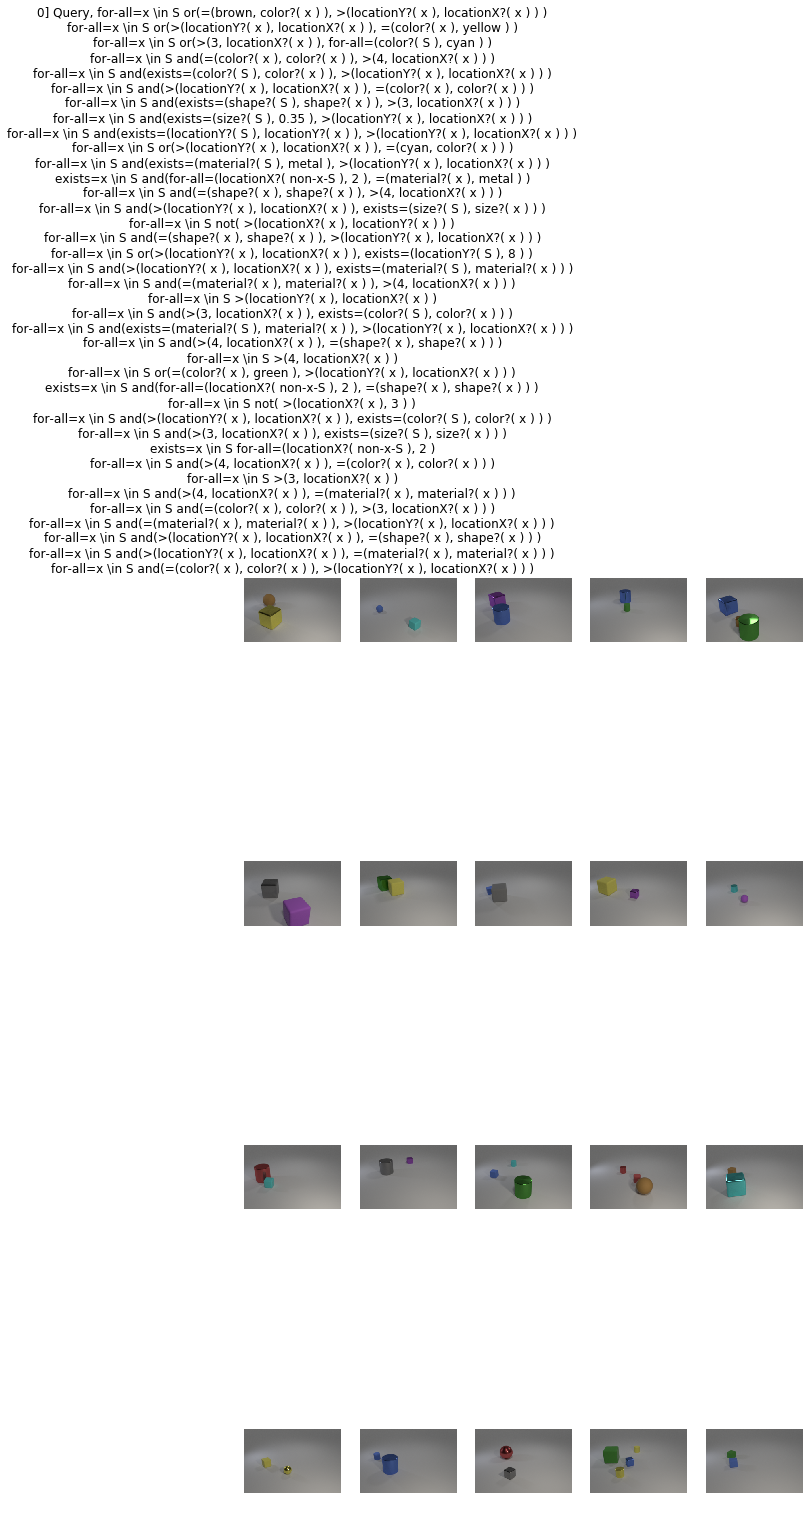

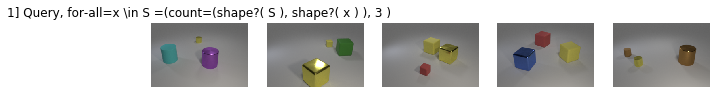

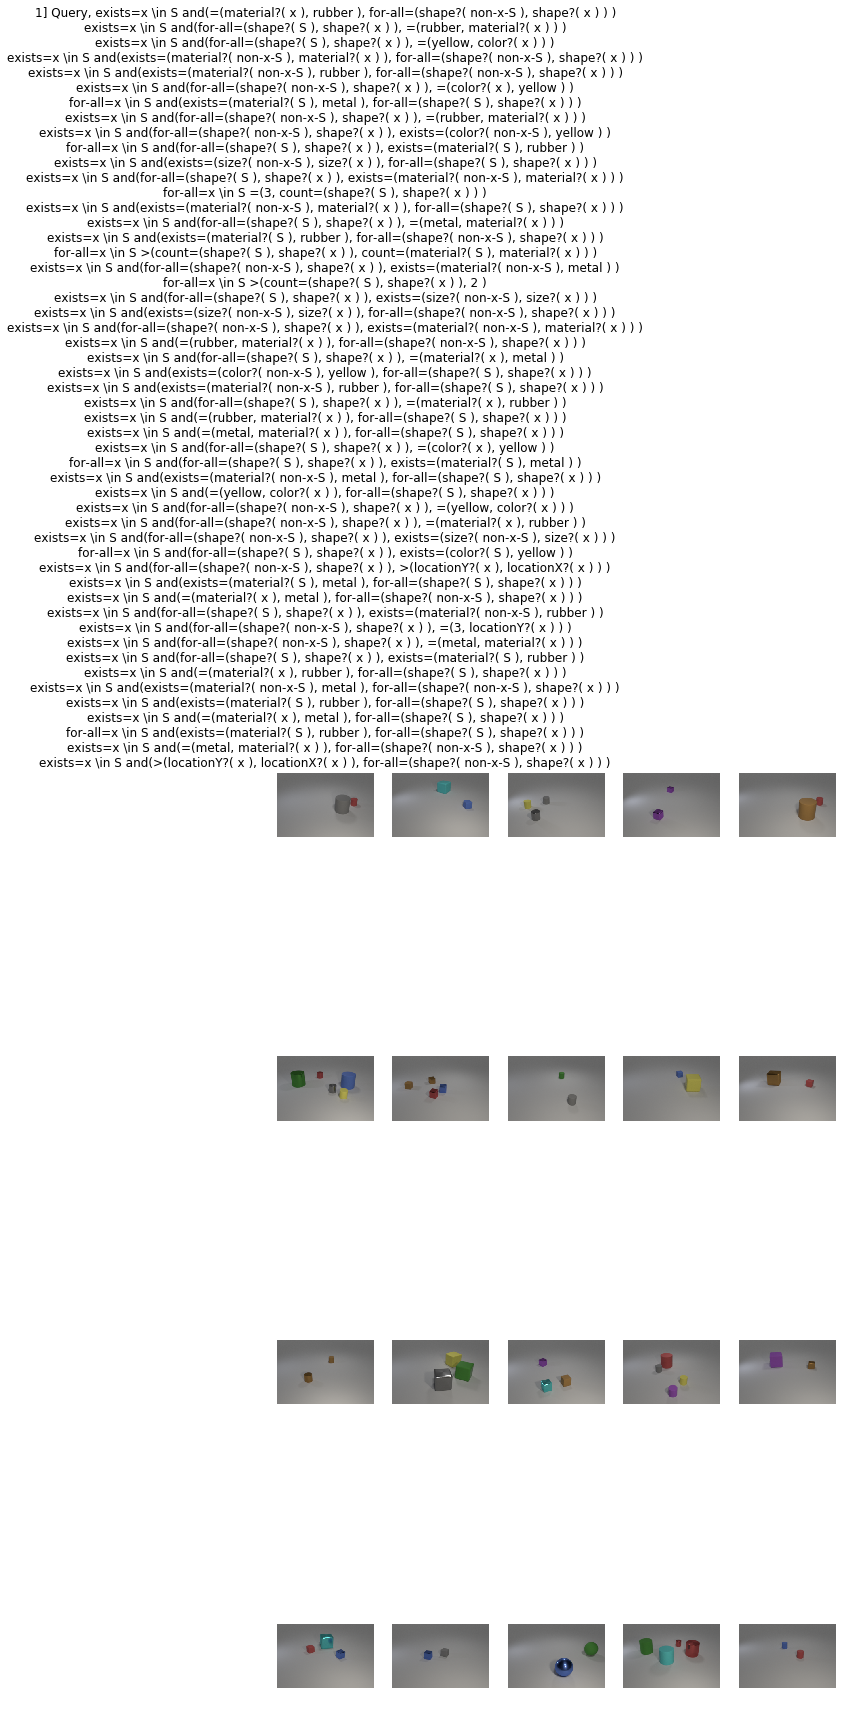

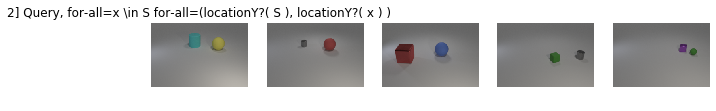

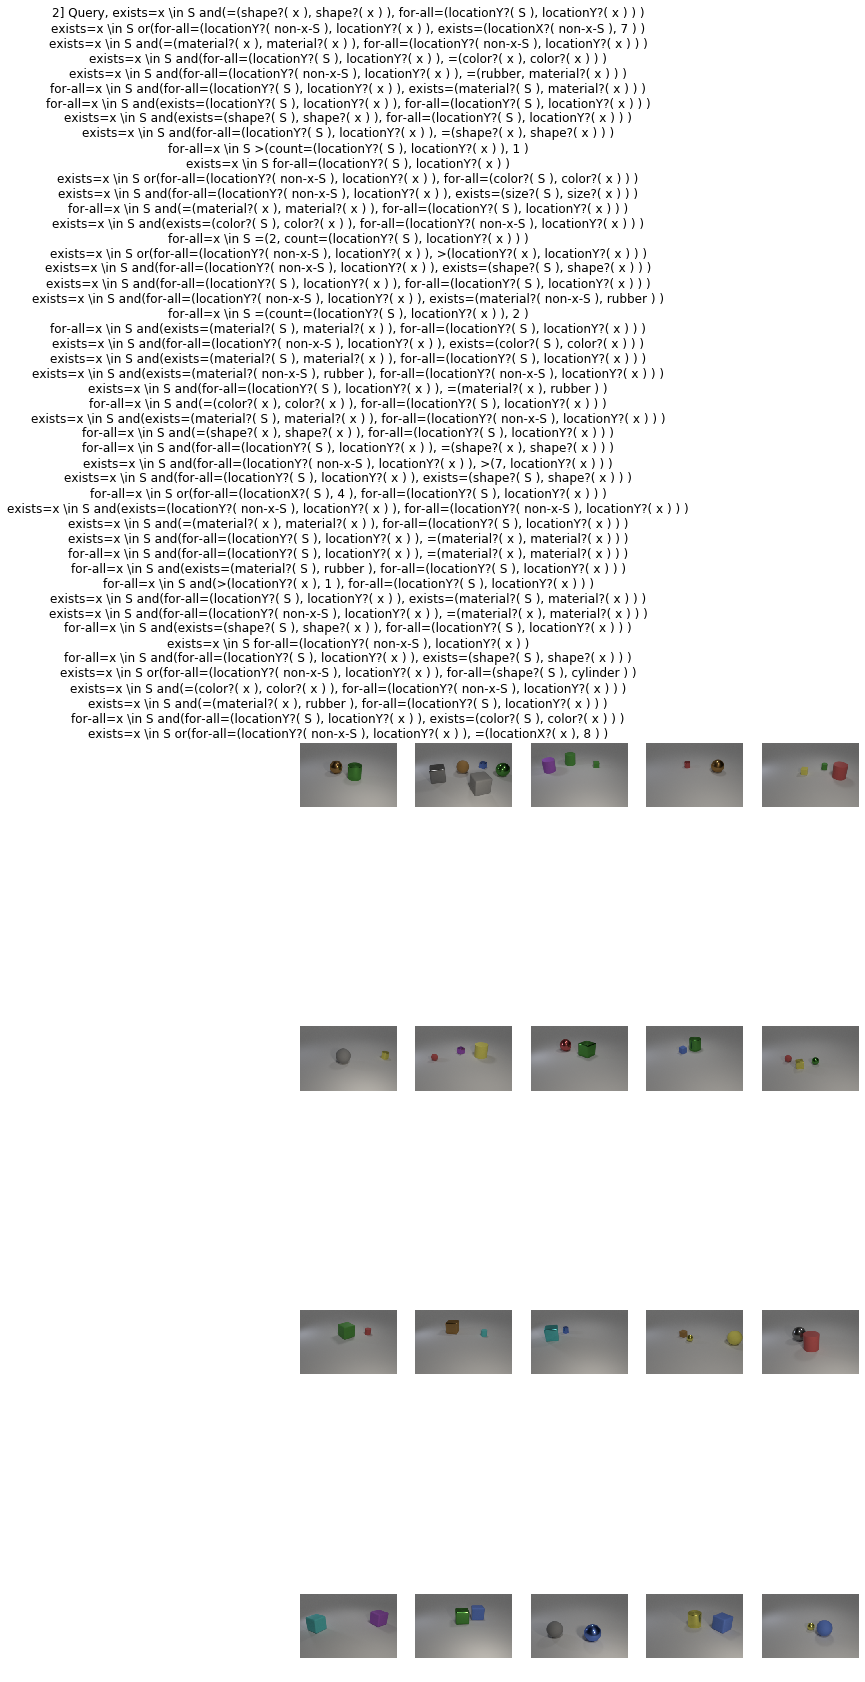

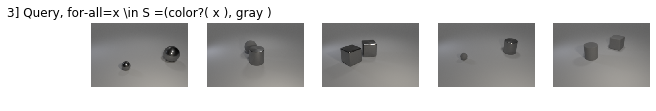

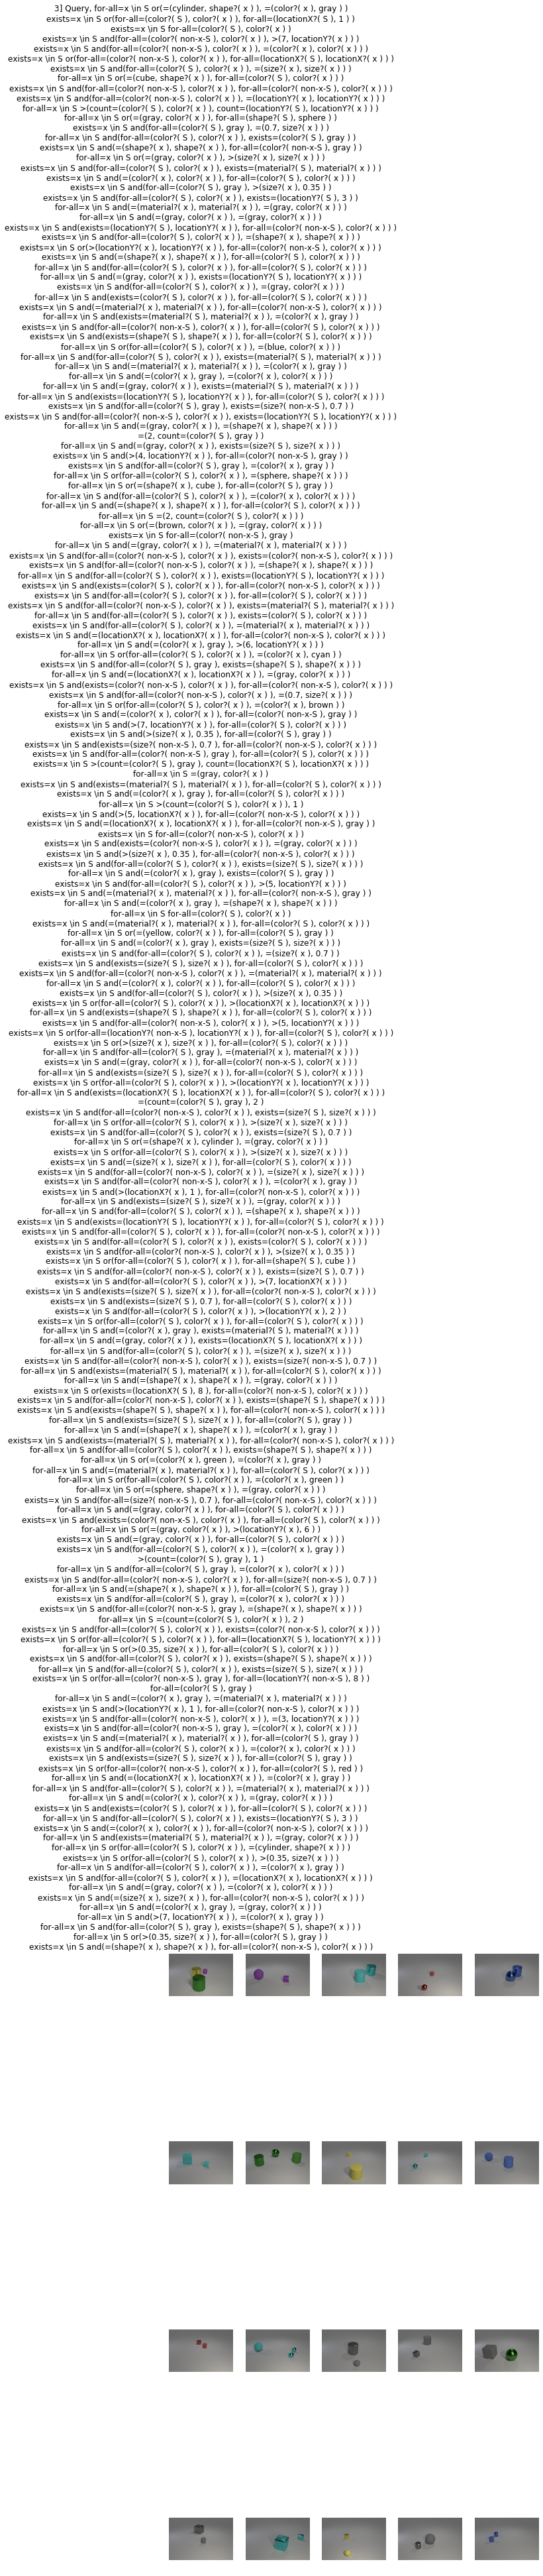

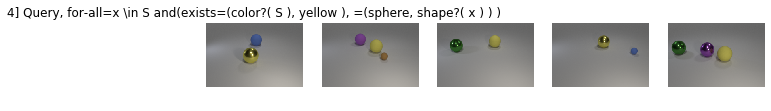

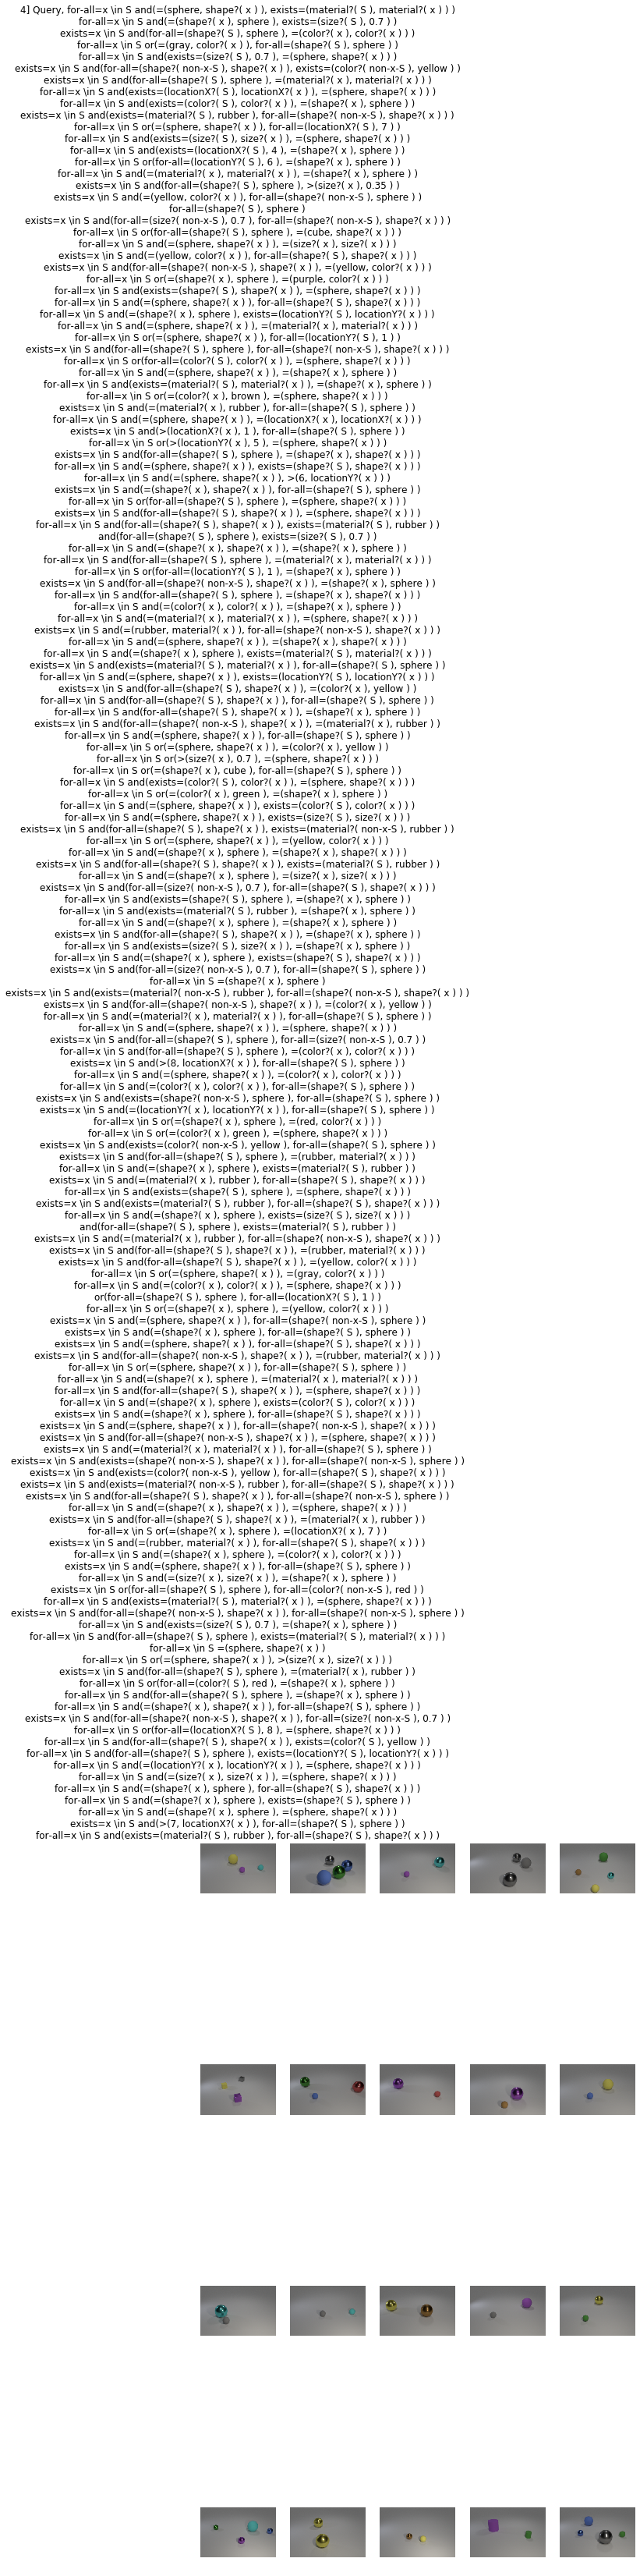

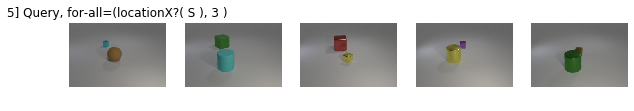

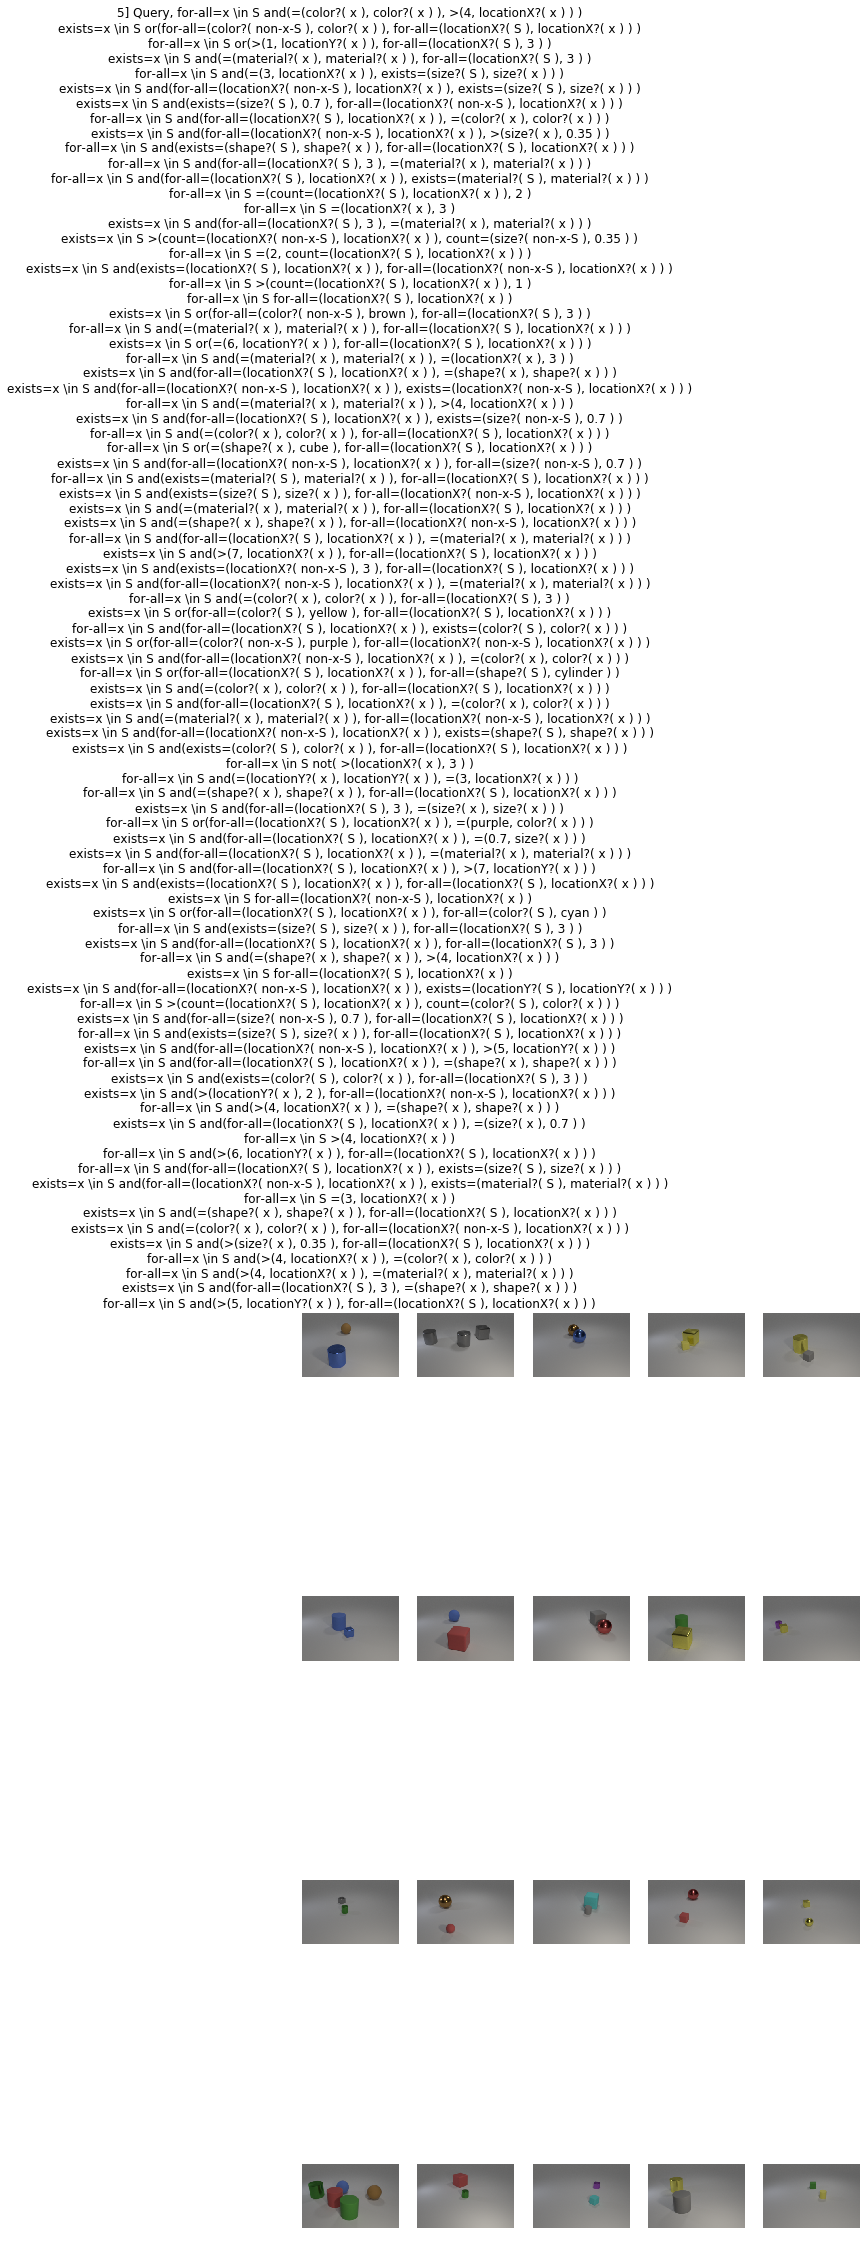

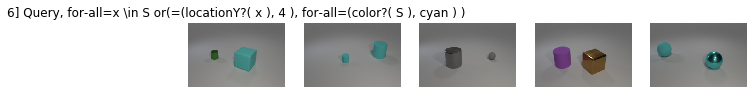

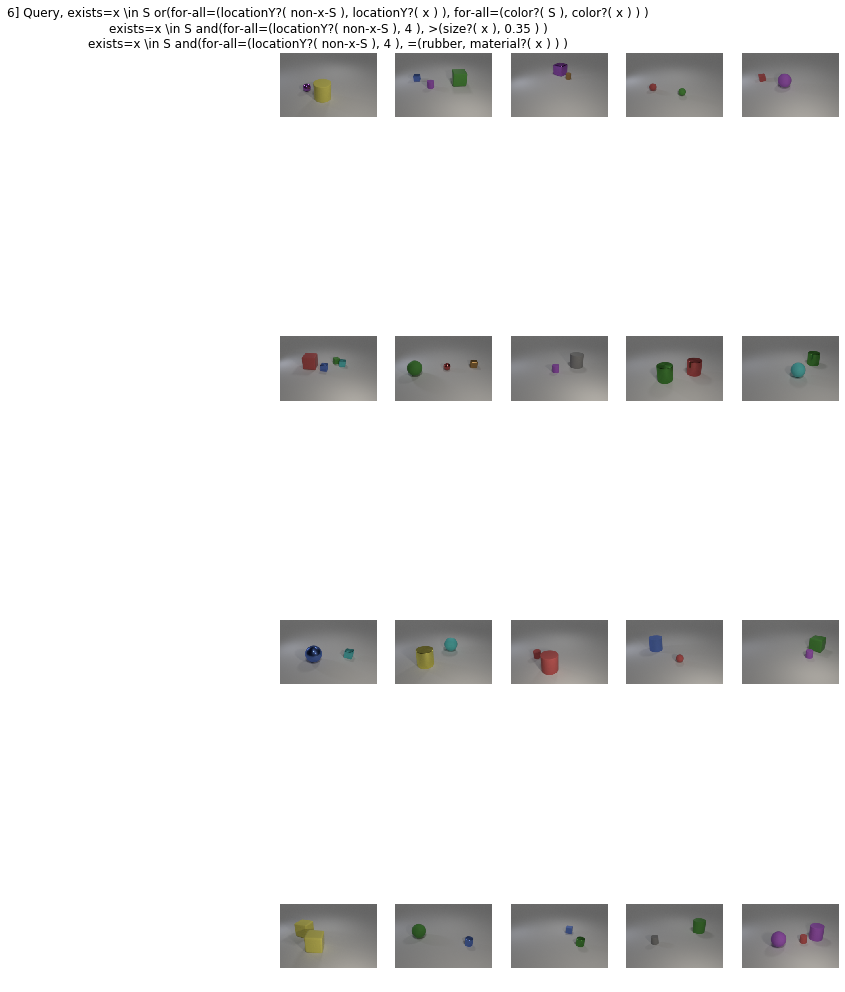

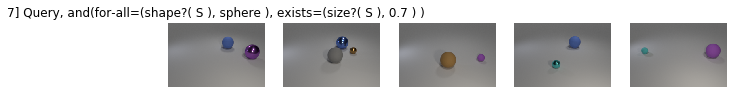

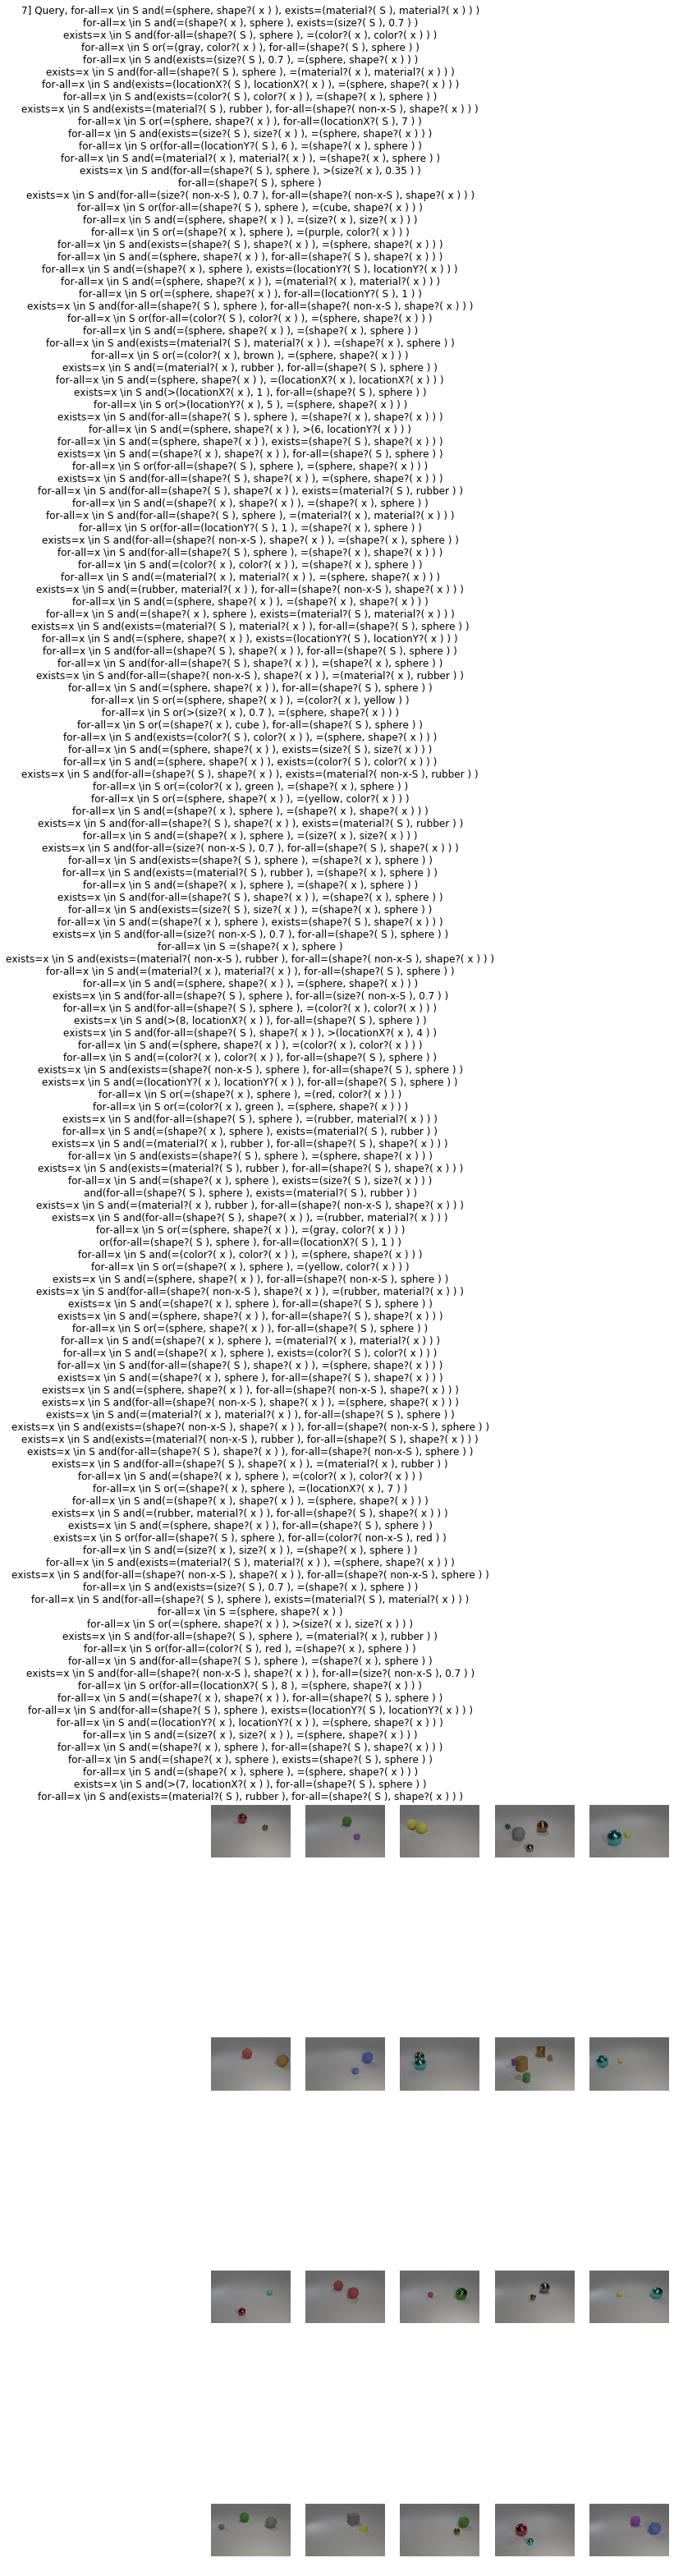

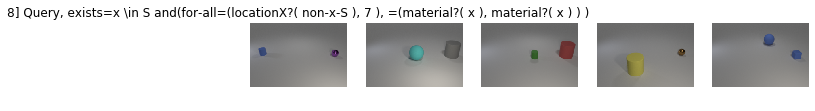

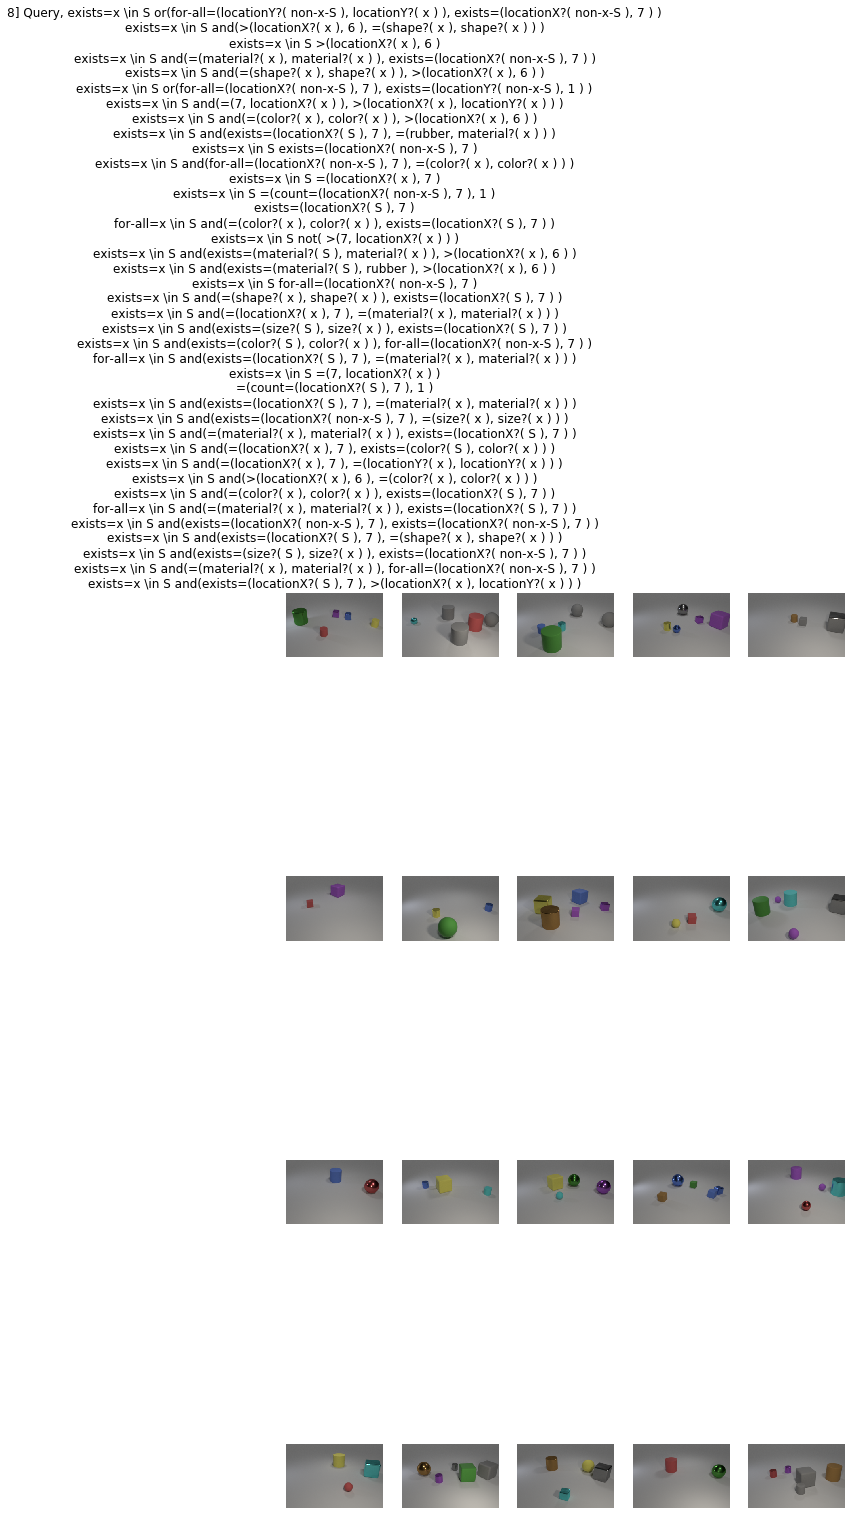

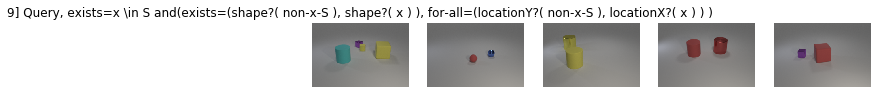

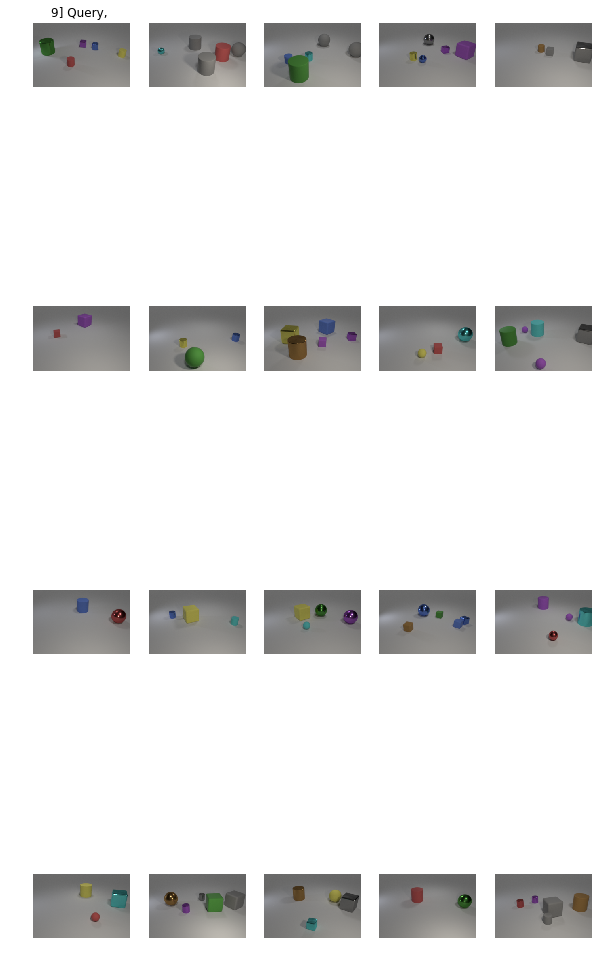

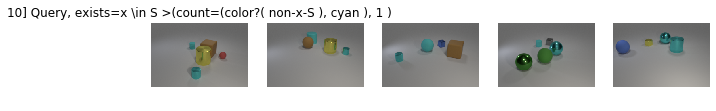

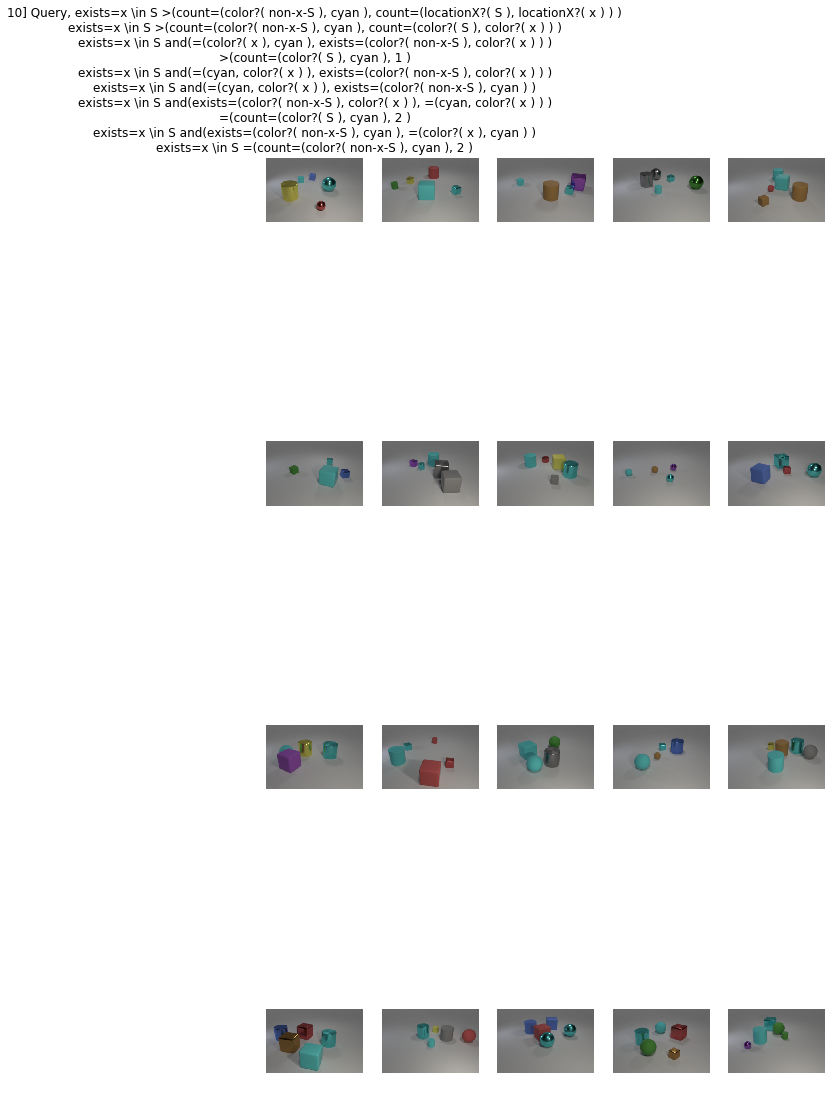

In [10]:
for this_idx, datum in enumerate(dataset):
    if this_idx > 10:
        break
    visualize_example(datum, this_idx, "test")